In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [52]:
dataset = pd.read_csv('GunViolence.csv')
dataset.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [53]:
dataset = pd.read_csv('GunViolence.csv', index_col = 'date')
dataset.index = pd.to_datetime(dataset.index)
dataset = dataset.sort_index()
dataset.head()

,incident_id,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,461105,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
2013-01-01,460726,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2013-01-01,478855,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
2013-01-05,478925,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
2013-01-07,478959,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [54]:
violence = dataset['n_killed'] + dataset['n_injured']
violence.head()

date
2013-01-01    4
2013-01-01    4
2013-01-01    4
2013-01-05    4
2013-01-07    4
dtype: int64

In [55]:
violence = violence.resample('D').sum()
violence.head()

date
2013-01-01    12
2013-01-02     0
2013-01-03     0
2013-01-04     0
2013-01-05     4
Freq: D, dtype: int64

Text(0.5,1,'Daily Trends')

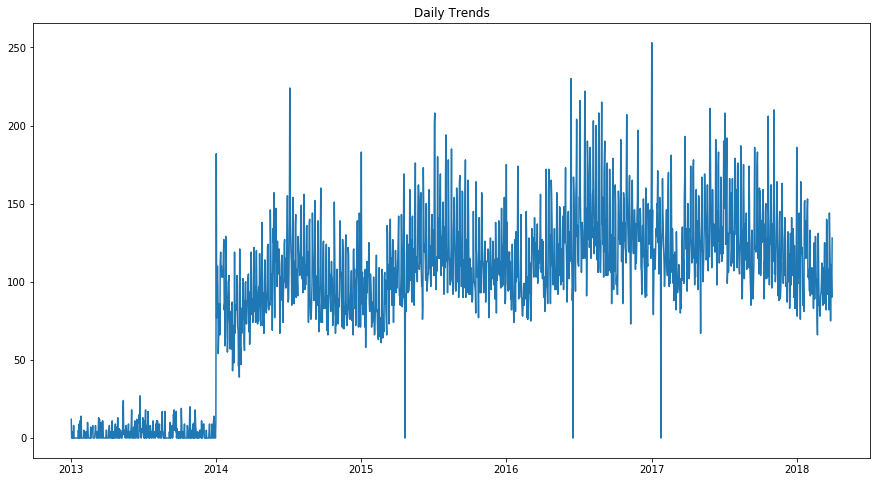

In [56]:
plt.plot(violence)
plt.title("Daily Trends")

Text(0.5,1,'Monthly Trends')

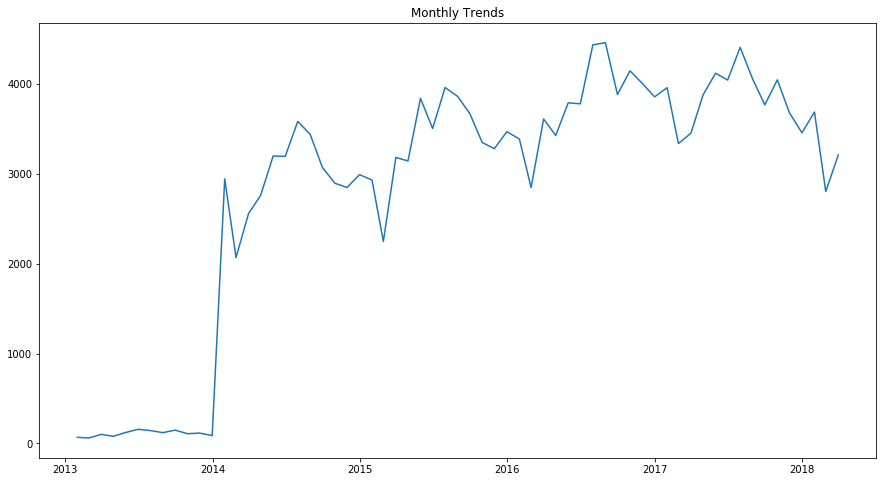

In [57]:
violence = violence.resample('M').sum()
plt.plot(violence)
plt.title("Monthly Trends")

In [58]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(timeseries):
    rolmean = pd.rolling_mean(timeseries, window = 12)
    rolstd = pd.rolling_std(timeseries, window = 12)
    
    original = plt.plot(timeseries, label = 'Original')
    mean = plt.plot(rolmean, label = 'Rolling mean')
    std = plt.plot(rolstd, label = 'Rolling standard deviation')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean and Standard Deviation")
    
    #Dickey Fuller Test
    print("Results of Dickey Fuller test on time series")
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'lags used', 'observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)

Results of Dickey Fuller test on time series
Test Statistic         -8.266589e+00
p-value                 4.919565e-13
lags used               1.100000e+01
observations used       5.100000e+01
Critical value (1%)    -3.565624e+00
Critical value (5%)    -2.920142e+00
Critical value (10%)   -2.598015e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


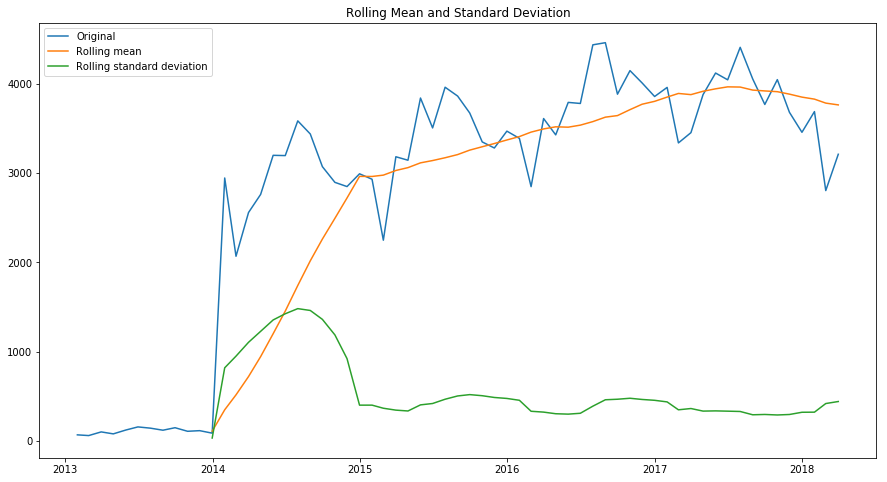

In [59]:
violence.dropna(inplace = True)
testStationarity(violence)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


Results of Dickey Fuller test on time series
Test Statistic          -2.689622
p-value                  0.075851
lags used                3.000000
observations used       59.000000
Critical value (1%)     -3.546395
Critical value (5%)     -2.911939
Critical value (10%)    -2.593652
dtype: float64


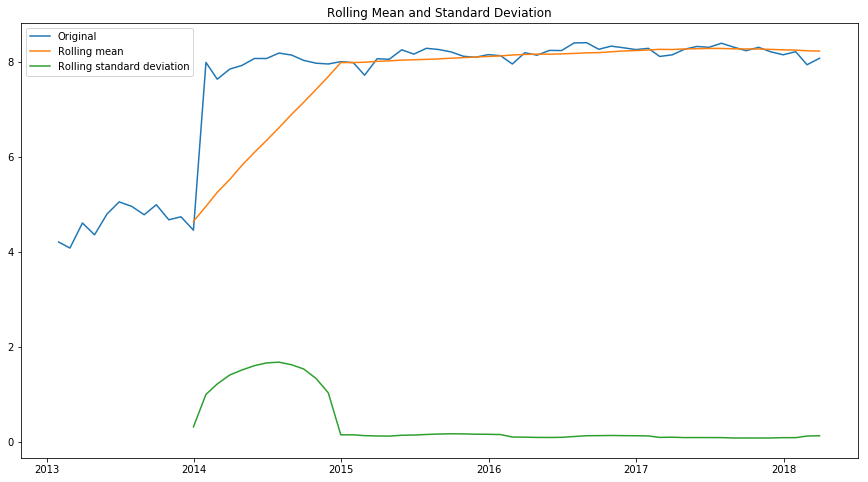

In [60]:
logviolence = np.log(violence)
logviolence.dropna(inplace = True)
testStationarity(logviolence)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


Results of Dickey Fuller test on time series
Test Statistic          -4.224935
p-value                  0.000598
lags used                9.000000
observations used       53.000000
Critical value (1%)     -3.560242
Critical value (5%)     -2.917850
Critical value (10%)    -2.596796
dtype: float64


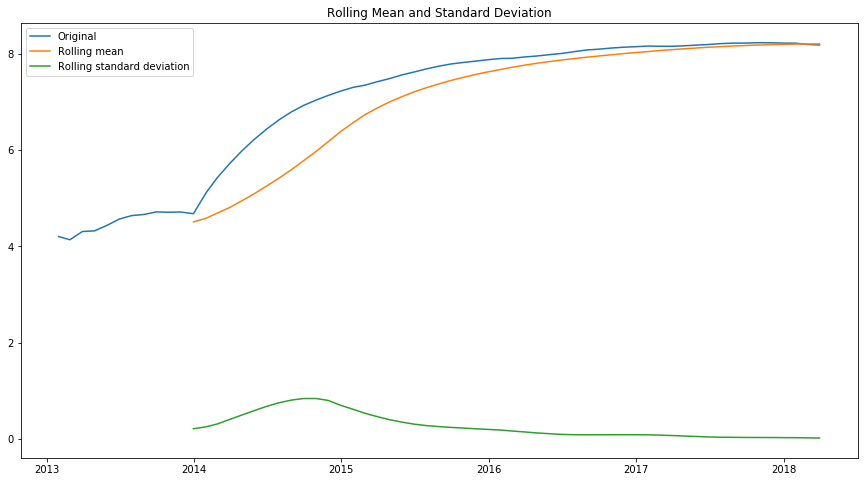

In [61]:
ewm = logviolence.ewm(halflife = 7).mean()
testStationarity(ewm)

Results of Dickey Fuller test on time series
Test Statistic          -2.716998
p-value                  0.071143
lags used                0.000000
observations used       62.000000
Critical value (1%)     -3.540523
Critical value (5%)     -2.909427
Critical value (10%)    -2.592314
dtype: float64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


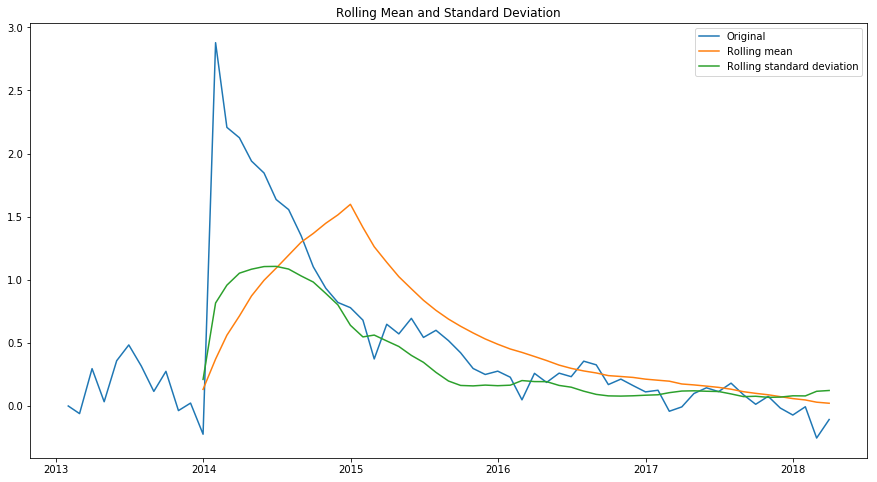

In [62]:
diff = logviolence - ewm
testStationarity(diff)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


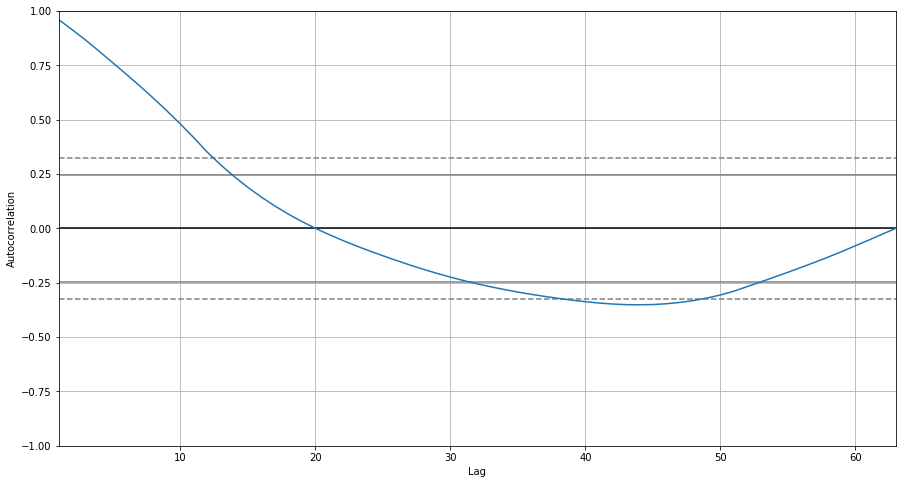

In [63]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(ewm)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is

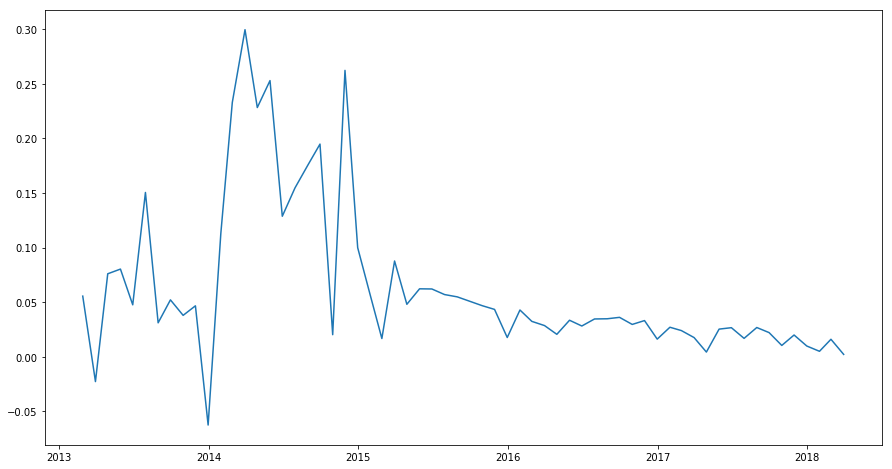

In [64]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ewm, order = (15, 1, 0))
model_fit = model.fit(disp = 0)
plt.plot(model_fit.fittedvalues)

In [65]:
logpred_diff = pd.Series(model_fit.fittedvalues, index = ewm.index)
logpred_cumsum = logpred_diff.cumsum()
logpred = pd.Series(ewm.iloc[0], index = ewm.index)
logpred = logpred.add(logpred_cumsum, fill_value = 0)
logpred.head()

date
2013-01-31    4.204693
2013-02-28    4.260307
2013-03-31    4.237664
2013-04-30    4.313732
2013-05-31    4.394102
Freq: M, dtype: float64

In [66]:
ewm.head()

date
2013-01-31    4.204693
2013-02-28    4.137970
2013-03-31    4.309353
2013-04-30    4.323004
2013-05-31    4.437148
Freq: M, dtype: float64

In [67]:
pred = np.exp(logpred)
pred.head()

date
2013-01-31    67.000000
2013-02-28    70.831731
2013-03-31    69.245905
2013-04-30    74.718790
2013-05-31    80.971924
Freq: M, dtype: float64

In [68]:
violence.head()

date
2013-01-31     67
2013-02-28     59
2013-03-31    100
2013-04-30     78
2013-05-31    121
Freq: M, dtype: int64

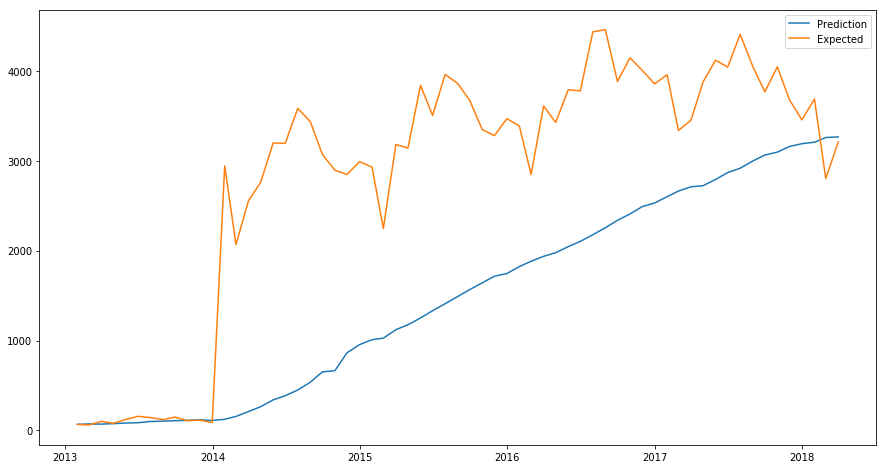

In [69]:
plt.plot(pred, label = 'Prediction')
plt.plot(violence, label = 'Expected')
plt.legend(loc = 'best')

In [70]:
violence.tail()

date
2017-11-30    3681
2017-12-31    3457
2018-01-31    3689
2018-02-28    2804
2018-03-31    3211
Freq: M, dtype: int64

In [71]:
dates = [pd.Timestamp('2018-05-31'), pd.Timestamp('2018-06-30'), pd.Timestamp('2018-07-31'), pd.Timestamp('2018-08-31'), pd.Timestamp('2018-09-30')]

In [72]:
forecast = pd.Series(model_fit.forecast(steps = 5)[0], dates)
forecast = np.exp(forecast)
forecast.head()

2018-05-31    3559.609536
2018-06-30    3607.856503
2018-07-31    3682.700656
2018-08-31    3773.922627
2018-09-30    3909.537606
dtype: float64

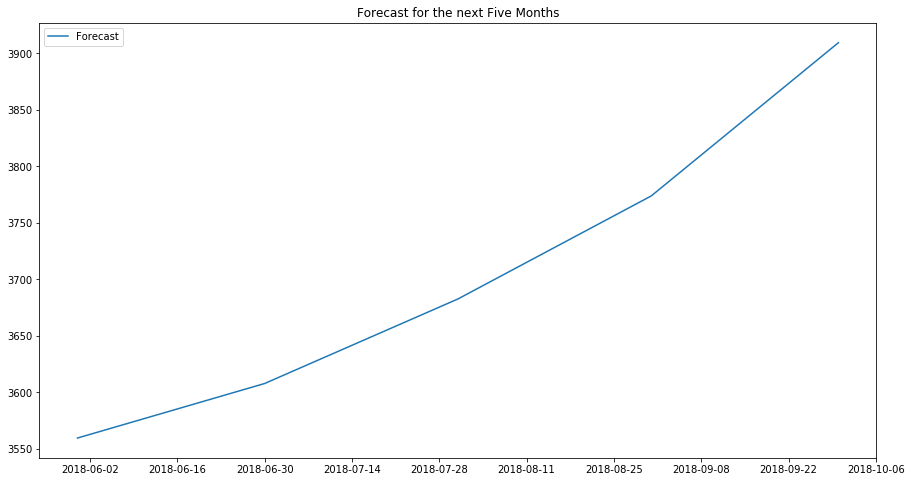

In [73]:
plt.plot(forecast, label = 'Forecast')
plt.title("Forecast for the next Five Months")
plt.legend(loc = 'best')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


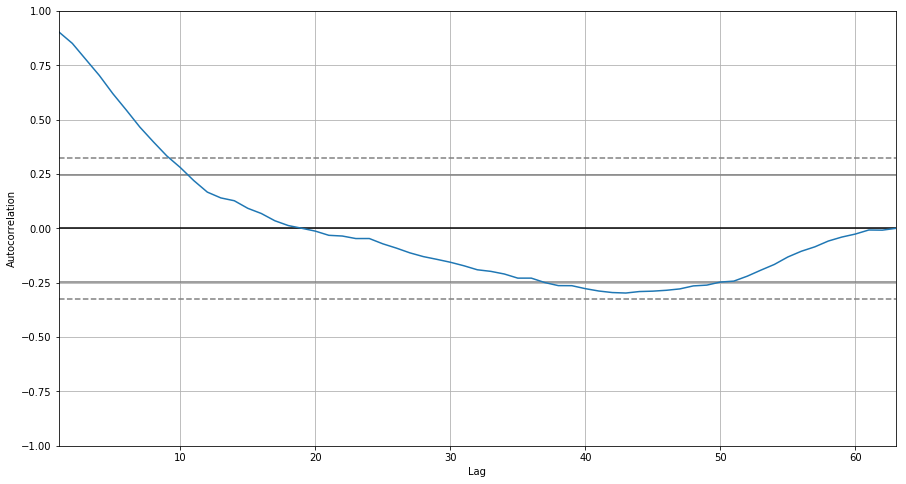

In [74]:
autocorrelation_plot(violence)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


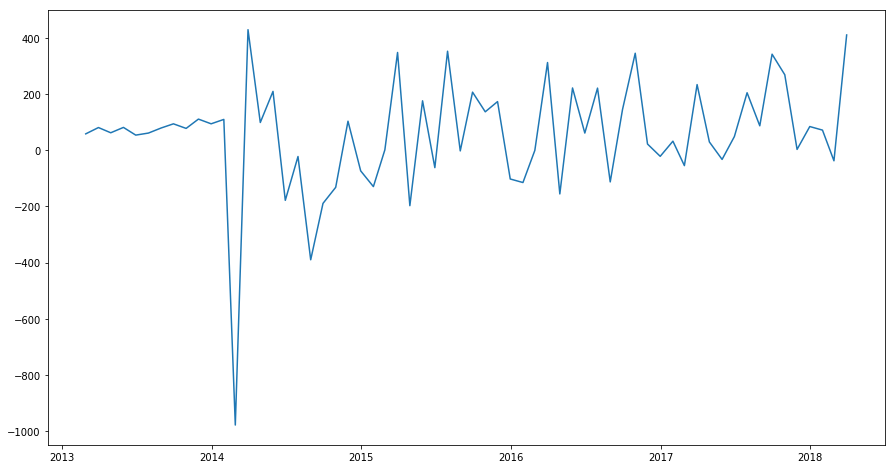

In [79]:
model = ARIMA(violence.astype(float), order = (10,1,0))
model_fit = model.fit(disp = 0)
plt.plot(model_fit.fittedvalues)

In [80]:
model_fit.fittedvalues.head()

date
2013-02-28    58.234658
2013-03-31    80.699094
2013-04-30    62.115254
2013-05-31    81.200604
2013-06-30    53.768535
Freq: M, dtype: float64

In [84]:
violence.head()

date
2013-01-31     67
2013-02-28     59
2013-03-31    100
2013-04-30     78
2013-05-31    121
Freq: M, dtype: int64

In [86]:
forecast = pd.Series(model_fit.forecast(steps = 5)[0], dates)
forecast

2018-05-31    3204.880949
2018-06-30    3363.461913
2018-07-31    3441.809772
2018-08-31    3623.208394
2018-09-30    3777.298025
dtype: float64

Text(0.5,1,'Forecasted')

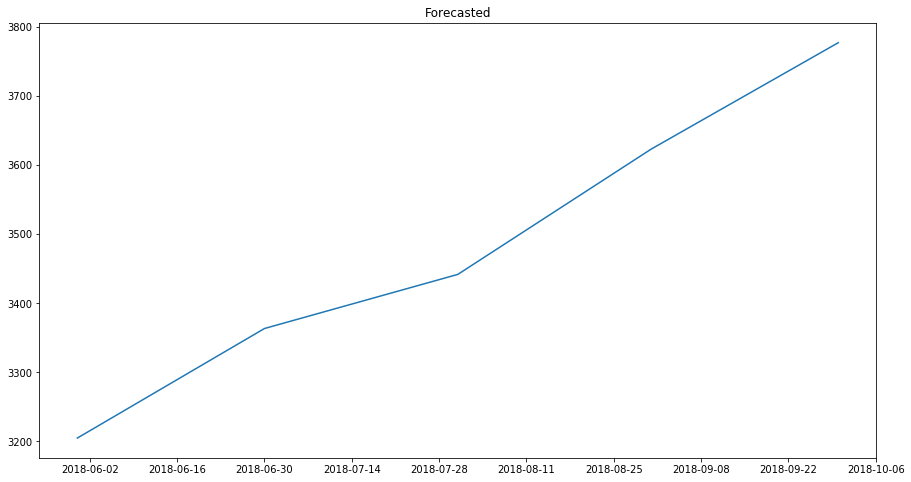

In [87]:
plt.plot(forecast)
plt.title("Forecasted")